# Robert Chang
# CSCIS-89 HW3

#<font color='red'>Problem 1. Execute all cells of the notebook 5.1-introduction-to-convnets.ipynb. Modify cell #7 and capture history object so that you could plot training and validation accuracy. Add a new cell and repeat training with L2 regularization. Use regularization parameter l=0.05 and l=0.01. Report on effect on overfitting, if any, and accuracy. Do not search for the optimal values for l and the number of epochs. Just report what you observe.</font>

In [0]:
import keras
keras.__version__
import matplotlib.pyplot as plt
from keras import regularizers

# 5.1 - Introduction to convnets

This notebook contains the code sample found in Chapter 5, Section 1 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff). Note that the original text features far more content, in particular further explanations and figures: in this notebook, you will only find source code and related comments.

----

First, let's take a practical look at a very simple convnet example. We will use our convnet to classify MNIST digits, a task that you've already been 
through in Chapter 2, using a densely-connected network (our test accuracy then was 97.8%). Even though our convnet will be very basic, its 
accuracy will still blow out of the water that of the densely-connected model from Chapter 2.

The 6 lines of code below show you what a basic convnet looks like. It's a stack of `Conv2D` and `MaxPooling2D` layers. We'll see in a 
minute what they do concretely.
Importantly, a convnet takes as input tensors of shape `(image_height, image_width, image_channels)` (not including the batch dimension). 
In our case, we will configure our convnet to process inputs of size `(28, 28, 1)`, which is the format of MNIST images. We do this via 
passing the argument `input_shape=(28, 28, 1)` to our first layer.

In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Let's display the architecture of our convnet so far:

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


You can see above that the output of every `Conv2D` and `MaxPooling2D` layer is a 3D tensor of shape `(height, width, channels)`. The width 
and height dimensions tend to shrink as we go deeper in the network. The number of channels is controlled by the first argument passed to 
the `Conv2D` layers (e.g. 32 or 64).

The next step would be to feed our last output tensor (of shape `(3, 3, 64)`) into a densely-connected classifier network like those you are 
already familiar with: a stack of `Dense` layers. These classifiers process vectors, which are 1D, whereas our current output is a 3D tensor. 
So first, we will have to flatten our 3D outputs to 1D, and then add a few `Dense` layers on top:

In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

We are going to do 10-way classification, so we use a final layer with 10 outputs and a softmax activation. Now here's what our network 
looks like:

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                36928     
__________

As you can see, our `(3, 3, 64)` outputs were flattened into vectors of shape `(576,)`, before going through two `Dense` layers.

Now, let's train our convnet on the MNIST digits. We will reuse a lot of the code we have already covered in the MNIST example from Chapter 
2.

In [0]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 166us/step - loss: 0.0080 - acc: 0.9976 - val_loss: 0.0423 - val_acc: 0.9916
Epoch 2/5
60000/60000 [==============================] - 10s 161us/step - loss: 0.0055 - acc: 0.9983 - val_loss: 0.0385 - val_acc: 0.9922
Epoch 3/5
60000/60000 [==============================] - 10s 161us/step - loss: 0.0056 - acc: 0.9983 - val_loss: 0.0433 - val_acc: 0.9919
Epoch 4/5
60000/60000 [==============================] - 10s 159us/step - loss: 0.0055 - acc: 0.9985 - val_loss: 0.0402 - val_acc: 0.9928
Epoch 5/5
60000/60000 [==============================] - 10s 160us/step - loss: 0.0041 - acc: 0.9988 - val_loss: 0.0434 - val_acc: 0.9931


Let's evaluate the model on the test data:

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 91us/step


In [0]:
test_acc

0.9915

While our densely-connected networks had a test accuracy of 97.8%, our basic convnet has a test accuracy of 99.3%: we 
decreased our error rate by 68% (relative). Not bad! 

In [0]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


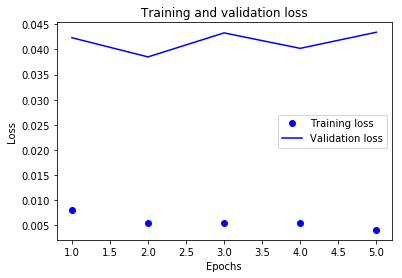

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##<font color='red'>I create my own model object using Keras sequential API, but this time I add L2 regularization of 0.01. I apply regularization to all my model layers. It is unclear if regularization should be added only to Dense layers, or to both Dense and Convolutional layers, but I add regularization to all layers.</font>

In [0]:
L2_model = models.Sequential()
L2_model.add(layers.Conv2D(32, (3, 3), kernel_regularizer=regularizers.l2(0.01), activation='relu', input_shape=(28, 28, 1)))
L2_model.add(layers.MaxPooling2D((2, 2)))
L2_model.add(layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.01), activation='relu'))
L2_model.add(layers.MaxPooling2D((2, 2)))
L2_model.add(layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.01), activation='relu'))
L2_model.add(layers.Flatten())
L2_model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
L2_model.add(layers.Dense(10, kernel_regularizer=regularizers.l2(0.01), activation='softmax'))


##<font color='red'>I repeat the training per the example, however regularization is definitely slowing down the training accuracy. Without regularization the accuracy and validation accuracy is quickly 99% after only a few epochs. With the regularization I am only achieving 91% accuracy in the first few epochs.</font>

In [0]:
L2_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
L2_history = L2_model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 11s 176us/step - loss: 0.8264 - acc: 0.9136 - val_loss: 0.4922 - val_acc: 0.9581
Epoch 2/5
60000/60000 [==============================] - 10s 169us/step - loss: 0.5021 - acc: 0.9484 - val_loss: 0.4582 - val_acc: 0.9615
Epoch 3/5
60000/60000 [==============================] - 10s 169us/step - loss: 0.4768 - acc: 0.9526 - val_loss: 0.4479 - val_acc: 0.9615
Epoch 4/5
60000/60000 [==============================] - 10s 168us/step - loss: 0.4685 - acc: 0.9540 - val_loss: 0.5153 - val_acc: 0.9393
Epoch 5/5
60000/60000 [==============================] - 10s 168us/step - loss: 0.4635 - acc: 0.9549 - val_loss: 0.4533 - val_acc: 0.9577


##<font color='red'>With regularization, the training loss and validation loss are more equal, meaning I am not overfitting to my training data. Without regularization, the validation loss is much higher than the training loss, meaning that the model is overfit to the training data.</font>

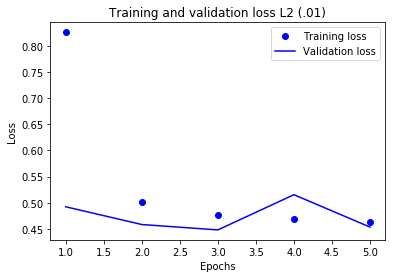

In [0]:
L2_loss = L2_history.history['loss']
L2_val_loss = L2_history.history['val_loss']
L2_epochs = range(1, len(L2_loss) + 1)
# "bo" is for "blue dot"
plt.plot(L2_epochs, L2_loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(L2_epochs, L2_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss L2 (.01)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##<font color='red'>I now re-run the model with L2 regularization of 0.05. The training accuracy has now slowed considerably, I am now achieving only 85% accuracy after the first few epochs, with a smaller regularization of 0.01 I achieved 95% accuracy after the first few epochs.</font>

In [0]:
BL2_model = models.Sequential()
BL2_model.add(layers.Conv2D(32, (3, 3), kernel_regularizer=regularizers.l2(0.05), activation='relu', input_shape=(28, 28, 1)))
BL2_model.add(layers.MaxPooling2D((2, 2)))
BL2_model.add(layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.05), activation='relu'))
BL2_model.add(layers.MaxPooling2D((2, 2)))
BL2_model.add(layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.05), activation='relu'))
BL2_model.add(layers.Flatten())
BL2_model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.05), activation='relu'))
BL2_model.add(layers.Dense(10, kernel_regularizer=regularizers.l2(0.05), activation='softmax'))

BL2_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
BL2_history = BL2_model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 11s 178us/step - loss: 1.8225 - acc: 0.7786 - val_loss: 1.5287 - val_acc: 0.7362
Epoch 2/5
60000/60000 [==============================] - 10s 168us/step - loss: 1.3264 - acc: 0.8352 - val_loss: 1.2805 - val_acc: 0.8465
Epoch 3/5
60000/60000 [==============================] - 10s 169us/step - loss: 1.2950 - acc: 0.8428 - val_loss: 1.2568 - val_acc: 0.8587
Epoch 4/5
60000/60000 [==============================] - 10s 169us/step - loss: 1.2807 - acc: 0.8479 - val_loss: 1.2810 - val_acc: 0.8421
Epoch 5/5
60000/60000 [==============================] - 10s 168us/step - loss: 1.2709 - acc: 0.8509 - val_loss: 1.4058 - val_acc: 0.7843


##<font color='red'>With 0.05 L2 regularization my training loss and validation loss are roughly equal, meaning that the model is not overfitting. However using regularization of 0.05, my loss is much higher than when using 0.01. With a large regularization, the model trains more slowly, so and it needs more epochs to achieve good accuracy.</font>

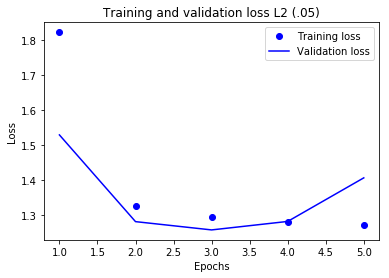

In [0]:
BL2_loss = BL2_history.history['loss']
BL2_val_loss = BL2_history.history['val_loss']
BL2_epochs = range(1, len(BL2_loss) + 1)
# "bo" is for "blue dot"
plt.plot(BL2_epochs, BL2_loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(BL2_epochs, BL2_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss L2 (.05)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()